# Compute Drawdown

In [1]:
import pandas as pd

<AxesSubplot:>

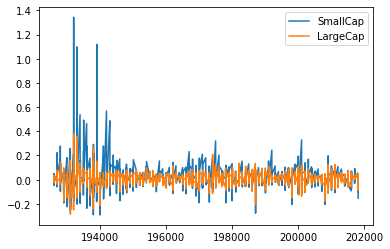

In [2]:
returns = pd.read_csv(
    "data/Portfolios_Formed_on_ME_monthly_EW.csv",
    header = 0, 
    index_col = 0, 
    parse_dates = True, 
    na_values = -99.99, 
)
columns = ["Lo 10", "Hi 10"]
portfolio = returns[columns]
portfolio = portfolio / 100
new_columns_names = ["SmallCap", "LargeCap"]
portfolio.columns = new_columns_names
portfolio.plot()

In [3]:
portfolio.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [4]:
portfolio.index = pd.to_datetime(portfolio.index, format="%Y%m")
portfolio.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [5]:
portfolio.index = portfolio.index.to_period("M")
portfolio.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [6]:
portfolio.loc["1976"]

,SmallCap,LargeCap
1976-01,0.2035,0.1147
1976-02,0.1605,-0.0185
1976-03,0.0285,0.0268
1976-04,-0.0010,-0.0113
1976-05,-0.0244,-0.0068
1976-06,0.0173,0.0537
1976-07,0.0043,-0.0066
1976-08,-0.0176,-0.0022
1976-09,0.0070,0.0234
1976-10,-0.0211,-0.0254


In [7]:
portfolio.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [8]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


<AxesSubplot:>

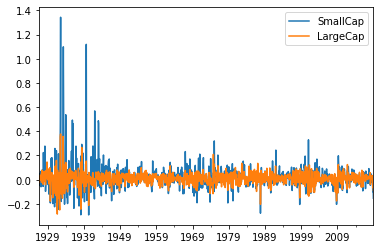

In [9]:
portfolio.plot()

# Compute Drawdowns
1. Compute the wealth index
2. Compute previous peaks
3. Compute drawdown - which is the wealth value as a percentage of the previous peak

In [10]:
# wealth index: value of a portfolio as it compounds over time
wealth_index = 1_000 * (1 + portfolio["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

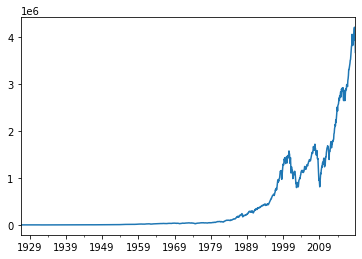

In [16]:
wealth_index.plot();

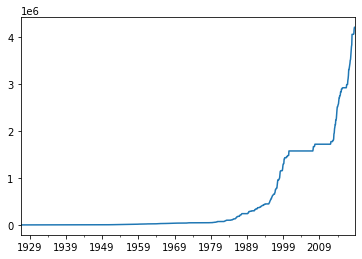

In [15]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot();

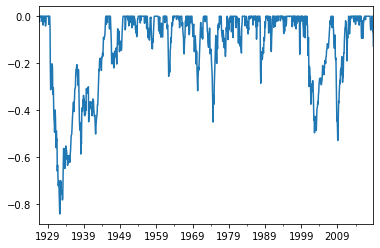

In [17]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot();

In [18]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [19]:
drawdown.min()

-0.8400375277943123

In [20]:
drawdown.loc["1975":].min()

-0.5280945042309304

In [21]:
drawdown.loc["1975":].idxmin()

Period('2009-02', 'M')

In [22]:
drawdown.idxmin()

Period('1932-05', 'M')

### Define your own function

In [26]:
def calculate_drawdown(return_series: pd.Series):
    """
    Takes a time series of returns
    Computes and returns a DataFrame:
        - Wealth index
        - Previous peaks
        - Percentage drawdown
    """
    wealth_index = 1_000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks) / previous_peaks
    drawdown_data = pd.DataFrame(
        {
            "wealth": wealth_index,
            "peaks": previous_peaks, 
            "drawdown": drawdown
        }
    )
    return drawdown_data

In [28]:
pd.options.display.float_format = '{:.4f}'.format

In [30]:
large_cap_drawdown = calculate_drawdown(portfolio["LargeCap"])
small_cap_drawdown = calculate_drawdown(portfolio["SmallCap"])

### Large Cam Analysis

<AxesSubplot:>

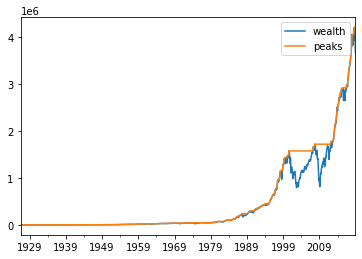

In [31]:
large_cap_drawdown[["wealth", "peaks"]].plot()

<AxesSubplot:>

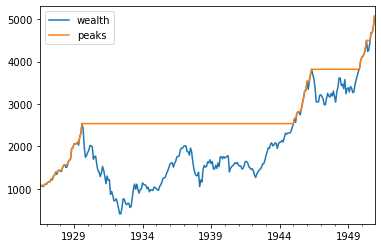

In [37]:
large_cap_drawdown.loc[:"1950"][["wealth", "peaks"]].plot()

In [40]:
large_cap_drawdown["drawdown"].loc[:"1950"].min()

-0.8400375277943123

In [44]:
large_cap_drawdown["drawdown"].loc[:"1950"].idxmin()

Period('1932-05', 'M')

### Small Cap Analysis

<AxesSubplot:>

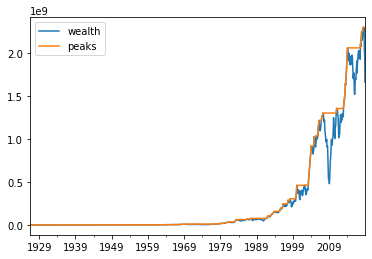

In [32]:
small_cap_drawdown[["wealth", "peaks"]].plot()

<AxesSubplot:>

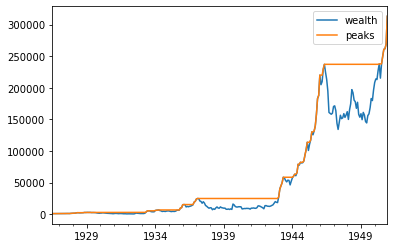

In [36]:
small_cap_drawdown.loc[:"1950"][["wealth", "peaks"]].plot()

In [41]:
small_cap_drawdown["drawdown"].loc[:"1950"].min()

-0.8330007793945303

In [45]:
small_cap_drawdown["drawdown"].loc[:"1950"].idxmin()

Period('1932-05', 'M')

In [46]:
small_cap_drawdown["drawdown"].loc["1975":].min()

-0.631206807725239